In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import math
# import report matrix
from sklearn.metrics import classification_report
import sklearn.model_selection as model_selection
from sklearn.linear_model import Perceptron
from sklearn.model_selection import KFold
from sklearn.linear_model import Perceptron
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

In [ ]:
! pip install imblearn

In [42]:
# Read data from csv file
data = pd.read_csv('body_level_classification_train.csv')

In [43]:
data.head()

,Gender,Age,Height,Weight,H_Cal_Consump,Veg_Consump,Water_Consump,Alcohol_Consump,Smoking,Meal_Count,Food_Between_Meals,Fam_Hist,H_Cal_Burn,Phys_Act,Time_E_Dev,Transport,Body_Level
0,Female,22.547298,1.722461,51.881263,yes,2.663421,1.041110,no,no,3.000000,Frequently,yes,no,0.794402,1.391948,Public_Transportation,Body Level 1
1,Male,19.799054,1.743702,54.927529,yes,2.000000,2.847264,Sometimes,no,3.289260,Sometimes,yes,no,1.680844,2.000000,Public_Transportation,Body Level 1
2,Female,17.823438,1.708406,50.000000,yes,1.642241,1.099231,Sometimes,no,3.452590,Sometimes,no,no,0.418875,1.000000,Public_Transportation,Body Level 1
3,Female,19.007177,1.690727,49.895716,yes,1.212908,1.029703,Sometimes,no,3.207071,Sometimes,no,no,2.000000,1.000000,Public_Transportation,Body Level 1
4,Male,19.729250,1.793315,58.195150,yes,2.508835,2.076933,no,no,3.435905,Sometimes,yes,no,2.026668,1.443328,Automobile,Body Level 1


In [25]:
# get unique values of Body Level
body_level = data['Body_Level'].unique()
body_level

array(['Body Level 1', 'Body Level 2', 'Body Level 3', 'Body Level 4'],
      dtype=object)

Body Level 4    680
Body Level 3    406
Body Level 2    201
Body Level 1    190
Name: Body_Level, dtype: int64


<BarContainer object of 4 artists>

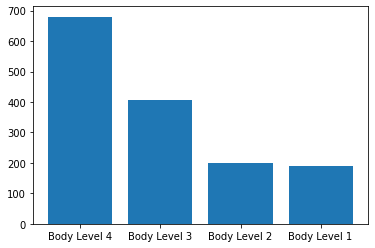

In [26]:
# draw body level distribution
body_level_count= data['Body_Level'].value_counts()
print(body_level_count)
plt.bar(body_level_count.index, body_level_count.values)

In [27]:
# chack if any null values
data.isnull().sum()

Gender                0
Age                   0
Height                0
Weight                0
H_Cal_Consump         0
Veg_Consump           0
Water_Consump         0
Alcohol_Consump       0
Smoking               0
Meal_Count            0
Food_Between_Meals    0
Fam_Hist              0
H_Cal_Burn            0
Phys_Act              0
Time_E_Dev            0
Transport             0
Body_Level            0
dtype: int64

In [44]:
# convert Body Level to numeric values
data['Gender'] = pd.factorize(data['Gender'])[0]
data['Body_Level'] = pd.factorize(data['Body_Level'])[0]
# H_Cal_Consump
data['H_Cal_Consump'] = pd.factorize(data['H_Cal_Consump'])[0]
# Alcohol_Consump
data['Alcohol_Consump'] = pd.factorize(data['Alcohol_Consump'])[0]
# Smoking
data['Smoking'] = pd.factorize(data['Smoking'])[0]
# Food_Between_Meals
data['Food_Between_Meals'] = pd.factorize(data['Food_Between_Meals'])[0]
# Fam_Hist
data['Fam_Hist'] = pd.factorize(data['Fam_Hist'])[0]
# H_Col_Burn
data['H_Cal_Burn'] = pd.factorize(data['H_Cal_Burn'])[0]
# Tranport
data['Transport'] = pd.factorize(data['Transport'])[0]
data.head()

,Gender,Age,Height,Weight,H_Cal_Consump,Veg_Consump,Water_Consump,Alcohol_Consump,Smoking,Meal_Count,Food_Between_Meals,Fam_Hist,H_Cal_Burn,Phys_Act,Time_E_Dev,Transport,Body_Level
0,0,22.547298,1.722461,51.881263,0,2.663421,1.041110,0,0,3.000000,0,0,0,0.794402,1.391948,0,0
1,1,19.799054,1.743702,54.927529,0,2.000000,2.847264,1,0,3.289260,1,0,0,1.680844,2.000000,0,0
2,0,17.823438,1.708406,50.000000,0,1.642241,1.099231,1,0,3.452590,1,1,0,0.418875,1.000000,0,0
3,0,19.007177,1.690727,49.895716,0,1.212908,1.029703,1,0,3.207071,1,1,0,2.000000,1.000000,0,0
4,1,19.729250,1.793315,58.195150,0,2.508835,2.076933,0,0,3.435905,1,0,0,2.026668,1.443328,1,0


In [45]:
# get X, y
X = data.drop(['Body_Level'], axis=1)
y = data['Body_Level']

### Train Model before Normalization 

In [12]:
#train, test = model_selection.train_test_split(data, train_size=0.8,test_size=0.2, random_state=0)
# get X_train, X_test, y_train, y_test
# X_train = train.drop(['Body_Level'], axis=1)
# y_train = train['Body_Level']
# X_test = test.drop(['Body_Level'], axis=1)
# y_test = test['Body_Level']


clf = Perceptron(penalty='l1',max_iter=10000,tol=None,eta0=0.1, random_state=0)
scores = cross_val_score(clf, X, y, cv=10)
print(f"Accuracy: {scores.mean():.2f} (+/- {scores.std():.2f})")


Accuracy: 0.78 (+/- 0.06)


In [13]:
clf = Perceptron(penalty='l1',max_iter=10000,tol=None,class_weight='balanced',eta0=0.1, random_state=0)
scores = cross_val_score(clf, X, y, cv=10)
print(f"Accuracy: {scores.mean():.2f} (+/- {scores.std():.2f})")

Accuracy: 0.80 (+/- 0.04)


Get beter results with balance the classes but can still get better results with normalization

### Normalize the data

In [49]:
# get the same effect as use the mean and std to normalize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [46]:
# # normalize all features using mean and standard deviation
# # Age
# data['Age'] = (data['Age'] - data['Age'].mean()) / data['Age'].std()
# # Height
# data['Height'] = (data['Height'] - data['Height'].mean()) / data['Height'].std()
# # Weight
# data['Weight'] = (data['Weight'] - data['Weight'].mean()) / data['Weight'].std()
# # Veg_Consump
# data['Veg_Consump'] = (data['Veg_Consump'] - data['Veg_Consump'].mean()) / data['Veg_Consump'].std()
# # Water_Consump
# data['Water_Consump'] = (data['Water_Consump'] - data['Water_Consump'].mean()) / data['Water_Consump'].std()
# # Meal_Count
# data['Meal_Count'] = (data['Meal_Count'] - data['Meal_Count'].mean()) / data['Meal_Count'].std()
# # Phys_Act
# data['Phys_Act'] = (data['Phys_Act'] - data['Phys_Act'].mean()) / data['Phys_Act'].std()
# # Time_E_Dev
# data['Time_E_Dev'] = (data['Time_E_Dev'] - data['Time_E_Dev'].mean()) / data['Time_E_Dev'].std()

# data.head()


In [47]:
# # split data into train and test and Body Level as target
# train, test = model_selection.train_test_split(data, train_size=0.8,test_size=0.2, random_state=101)
# # get X_train, X_test, y_train, y_test
# X_train = train.drop(['Body_Level'], axis=1)
# y_train = train['Body_Level']
# X_test = test.drop(['Body_Level'], axis=1)
# y_test = test['Body_Level']

### penalty
L1 penalty: Also known as Lasso regularization, the L1 penalty adds the absolute value
of the weights to the loss function. This encourages the weights to take on sparse values,
with many weights being exactly zero. This can be useful for feature selection.

L2 penalty: Also known as Ridge regularization, the L2 penalty adds the squared value of the weights
to the loss function. This encourages the weights to take on small values, without necessarily making
them zero. This can be useful for preventing overfitting.

Elastic Net penalty: The Elastic Net penalty is a combination of L1 and L2 regularization.
It adds both the absolute value and the squared value of the weights to the loss function,
with a parameter l1_ratio controlling the balance between the two penalties.

In [52]:
# creat table of options of penalty option and score
penalty_options = ['l1', 'l2', 'elasticnet', 'none']
score = [0.0, 0.0, 0.0, 0.0]
for i in range(len(penalty_options)):
    # create an instance of the Perceptron class with multi_class='ovr'
    clf = Perceptron(penalty=penalty_options[i],tol=1e-3, random_state=0)
    scores = cross_val_score(clf, X, y, cv=10)
    # save scores mean and std
    score[i] = f"{scores.mean():.2f} (+/- {scores.std():.2f})"
penalty_score = pd.DataFrame({'penalty_options': penalty_options, 'score': score})
penalty_score

,penalty_options,score
0,l1,0.83 (+/- 0.04)
1,l2,0.77 (+/- 0.04)
2,elasticnet,0.76 (+/- 0.03)
3,none,0.80 (+/- 0.03)


In [54]:
# for penalty='l1' get the coef_
clf = Perceptron(penalty='l1',tol=1e-3, random_state=0)
clf.fit(X,y)
# wheights of classe 0
w0 = clf.coef_[0]
# wheights of classe 1
w1 = clf.coef_[1]
# wheights of classe 2
w2 = clf.coef_[2]
# wheights of classe 3
w3 = clf.coef_[3]

# show this values in table colume is the feature and row is the class
w = pd.DataFrame({'w0': w0, 'w1': w1, 'w2': w2, 'w3': w3}).T
# all features name in data exept Body_Level
w.columns = data.columns[:-1]
w.index= ['Body_Level_1', 'Body_Level_2', 'Body_Level_3', 'Body_Level_4']
w

,Gender,Age,Height,Weight,H_Cal_Consump,Veg_Consump,Water_Consump,Alcohol_Consump,Smoking,Meal_Count,Food_Between_Meals,Fam_Hist,H_Cal_Burn,Phys_Act,Time_E_Dev,Transport
Body_Level_1,-0.418652,-0.162560,12.654477,-58.465949,0.696657,2.902547,2.342611,2.301716,-5.422564,0.438756,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Body_Level_2,1.567177,0.000000,-2.200981,-6.284854,0.000000,0.000000,0.000000,0.000000,4.884223,-3.026057,0.000000,4.237033,0.000000,0.000000,0.000000,0.413461
Body_Level_3,0.000000,1.806863,0.000000,-6.425456,-2.116976,0.000000,4.289117,-2.805226,0.000000,0.000000,2.712318,-2.334438,1.541301,-0.009135,-0.927955,-1.615319
Body_Level_4,-4.139900,0.000000,-21.706860,69.232864,0.000000,0.000000,2.011424,0.000000,3.228269,0.000000,0.000000,0.000000,-0.420052,0.000000,0.000000,0.000000


penalty l1: get the best Score
the coef for some features are 0 it is do feature selection

### alpha
parameter controls the strength of the regularization penalty.
The regularization penalty is added to the loss function during training
to prevent overfitting of the model, and alpha determines the weight of the penalty relative
to the classification error.

A higher value of alpha will result in a stronger regularization penalty,
which will cause the weights to take on smaller values and can help to prevent overfitting.
However, setting alpha too high can also result in underfitting, where the model
is not able to capture the complexity of the data.

On the other hand, setting alpha too low will result in a weaker regularization penalty,
which may not be enough to prevent overfitting.

default=0.0001

In [55]:
# creat table of options of alpha option and score
alpha_options = [.01, .001, .0001, .00001]
score = [0.0, 0.0, 0.0, 0.0]
for i in range(len(alpha_options)):
    # create an instance of the Perceptron class with multi_class='ovr'
    clf = Perceptron(penalty='l1',alpha=alpha_options[i],tol=1e-3, random_state=0)
    scores = cross_val_score(clf, X, y, cv=10)
    # save scores mean and std
    score[i] = f"{scores.mean():.2f} (+/- {scores.std():.2f})"
alpha_score = pd.DataFrame({'alpha_options': alpha_options, 'score': score})
alpha_score


,alpha_options,score
0,0.01000,0.68 (+/- 0.04)
1,0.00100,0.82 (+/- 0.03)
2,0.00010,0.83 (+/- 0.04)
3,0.00001,0.81 (+/- 0.04)


alpha=.00001 is weaker regularization penalty it is give same score as set regularization penalty to None

but alpha=.01 is stronger regularization penalty it is get underfitting, where the model
is not able to capture the complexity of the data

### l1_ratio

l1_ratio parameter is used when the regularization penalty is set to 'elasticnet'. The Elastic Net penalty is a combination of L1 and L2 regularization penalties, with l1_ratio controlling the balance between the two penalties.

When l1_ratio is 1, the regularization penalty is entirely L1 regularization (Lasso penalty).

When l1_ratio is 0, the regularization penalty is entirely L2 regularization (Ridge penalty).

When l1_ratio is between 0 and 1, the regularization penalty is a combination of L1 and L2 regularization.

In [56]:
# creat table of l1_ratio option and score
l1_ratio_options = [0, .3, .7, 1]
score = [0.0, 0.0, 0.0, 0.0]
for i in range(len(l1_ratio_options)):
    # create an instance of the Perceptron class with multi_class='ovr'
    clf = Perceptron(penalty='elasticnet',l1_ratio=l1_ratio_options[i],tol=1e-3, random_state=0)
    scores = cross_val_score(clf, X, y, cv=10)
    # save scores mean and std
    score[i] = f"{scores.mean():.2f} (+/- {scores.std():.2f})"
l1_ratio_score = pd.DataFrame({'l1_ratio_options': l1_ratio_options, 'score': score})
l1_ratio_score


,l1_ratio_options,score
0,0.0,0.77 (+/- 0.04)
1,0.3,0.78 (+/- 0.03)
2,0.7,0.82 (+/- 0.04)
3,1.0,0.83 (+/- 0.04)


get best score when l1_ratio=1 it is L1 regularization (Lasso penalty) as it is do feature selection and set some coef to 0

### fit_intercept
fit_intercept parameter controls whether or not to include an intercept term (bias term) in the model. An intercept term is a constant value that is added to the linear combination of the input features before applying the activation function.

If fit_intercept is set to True (default), an intercept term is included in the model. This means that the decision boundary is not necessarily forced to go through the origin, and the model can learn a bias term that shifts the decision boundary.

If fit_intercept is set to False, the model will not have an intercept term, and the decision boundary will always go through the origin.

defaults to True.

In [58]:
# creat table of options of fit_intercept option and score
fit_intercept_options = [True, False]
score = [0.0, 0.0]
for i in range(len(fit_intercept_options)):
    # create an instance of the Perceptron class with multi_class='ovr'
    clf = Perceptron(penalty='l1',fit_intercept=fit_intercept_options[i],tol=1e-3, random_state=0)
    scores = cross_val_score(clf, X, y, cv=10)
    # save scores mean and std
    score[i] = f"{scores.mean():.2f} (+/- {scores.std():.2f})"
    #print("intercept Term for fit_intercept= ",fit_intercept_options[i],"is",clf.intercept_)
fit_intercept_score = pd.DataFrame({'fit_intercept_options': fit_intercept_options, 'score': score})
fit_intercept_score

,fit_intercept_options,score
0,True,0.83 (+/- 0.04)
1,False,0.70 (+/- 0.04)


fit_intercept=True is get best score as it give the model can learn a bias term that shifts the decision boundary.

### max_iter
max_iter parameter controls the maximum number of iterations (epochs) that the algorithm will run for. Each iteration updates the weights based on the error between the predicted and actual labels for the training examples.

If the algorithm has not converged after max_iter iterations, it will stop and return the current weights. Setting max_iter to a higher value can potentially improve the performance of the model by allowing the weights to converge to a better solution, but it also increases the computation time.

defaults to 1000


In [59]:
# creat table of options of max_iter option and score
max_iter_options = [100,1000, 10000, 100000]
score = [0.0, 0.0, 0.0, 0.0]
for i in range(len(max_iter_options)):
    # create an instance of the Perceptron class with multi_class='ovr'
    clf = Perceptron(penalty='l1',max_iter=max_iter_options[i],tol=None, random_state=0)
    scores = cross_val_score(clf, X, y, cv=10)
    # save scores mean and std
    score[i] = f"{scores.mean():.2f} (+/- {scores.std():.2f})"
max_iter_score = pd.DataFrame({'max_iter_options': max_iter_options, 'score': score})
max_iter_score

,max_iter_options,score
0,100,0.79 (+/- 0.04)
1,1000,0.83 (+/- 0.04)
2,10000,0.86 (+/- 0.02)
3,100000,0.84 (+/- 0.03)


set the tol to None to force the model to run for max_iter iterations
number of iterations is 10000 get beter score than the default 1000
but increase the number of iterations to 100000 get worse score

model may continue to update the weights even after it has converged to a good solution. This can cause the model to start fitting the noise in the training data, rather than the underlying pattern. 

### tol
tol parameter specifies the tolerance for the stopping criterion. The stopping criterion is used to determine when the algorithm has converged to a solution.

During training, the Perceptron algorithm updates the weights for each training example until either the weights have converged to a good solution or the maximum number of iterations (max_iter) has been reached. The stopping criterion is used to determine when the algorithm has converged to a good solution.

The tol parameter specifies the minimum change in the weights required for the algorithm to continue updating the weights. If the change in the weights is less than tol, the algorithm considers the weights to have converged and stops updating them.

In [60]:
# creat table of options of tol option and score
tol_options = [ 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, None]
score = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
for i in range(len(tol_options)):
    # create an instance of the Perceptron class with multi_class='ovr'
    clf = Perceptron(penalty='l1',max_iter=10000,tol=tol_options[i], random_state=0)
    scores = cross_val_score(clf, X, y, cv=10)
    # save scores mean and std
    score[i] = f"{scores.mean():.2f} (+/- {scores.std():.2f})"
tol_score = pd.DataFrame({'tol_options': tol_options, 'score': score})
tol_score

,tol_options,score
0,0.010000,0.83 (+/- 0.04)
1,0.001000,0.83 (+/- 0.04)
2,0.000100,0.83 (+/- 0.04)
3,0.000010,0.83 (+/- 0.04)
4,0.000001,0.83 (+/- 0.04)
5,NaN,0.86 (+/- 0.02)


Have tol=None to fore the model to run for max_iter iterations get best score 

### eta0
eta0 parameter specifies the learning rate, which controls the step size used to update the weights during training. The learning rate determines the speed at which the algorithm learns and can have a significant impact on the performance of the model.

The eta0 parameter represents the initial learning rate, which is used at the beginning of training. The learning rate is then gradually decreased during training, typically using a schedule such as a power law or exponential decay.

A higher learning rate (i.e., larger eta0) can lead to faster convergence of the algorithm, but it may also lead to unstable behavior if the learning rate is set too high. Conversely, a lower learning rate (i.e., smaller eta0) can lead to slower convergence but more stable behavior.

In [61]:
# creat table of options of eta0 option and score
eta0_options=[3,1, 0.1, 0.01, 0.001]
score = [0.0, 0.0, 0.0, 0.0,0.0]
for i in range(len(eta0_options)):
    clf = Perceptron(penalty='l1',max_iter=10000,tol=None,eta0=eta0_options[i] ,random_state=0)
    scores = cross_val_score(clf, X, y, cv=10)
    # save scores mean and std
    score[i] = f"{scores.mean():.2f} (+/- {scores.std():.2f})"
eta0_options = pd.DataFrame({'eta0_options': eta0_options, 'score': score})
eta0_options    

,eta0_options,score
0,3.000,0.86 (+/- 0.02)
1,1.000,0.86 (+/- 0.02)
2,0.100,0.85 (+/- 0.02)
3,0.010,0.86 (+/- 0.02)
4,0.001,0.86 (+/- 0.02)


as max_iter is 10000 is large enough to get the best score regardless of the learning rate
<!-- learning rate is 0.1 get best score as it reduce the step size used to update the weights during training let the max_iter to 10000 to get the best weights -->

### class_weight

class_weight parameter is used to adjust the weights of the samples in the training set to account for class imbalance. This can be important in cases where one or more classes are underrepresented in the dataset.

The class_weight parameter can be specified as a dictionary where the keys are the class labels and the values are the weights assigned to each class. Alternatively, it can be set to 'balanced', in which case scikit-learn will automatically compute the class weights based on the frequency of each class in the training set.

Setting the class weights allows the algorithm to give more importance to the underrepresented classes, which can help to improve the overall performance of the model. Without class weighting, the algorithm may be biased towards the majority class, leading to poor performance on the minority classes.

In [64]:
# creat table of options of class_weight option and score
class_weight_options = [None, 'balanced']
score = [0.0, 0.0]
for i in range(len(class_weight_options)):
    # create an instance of the Perceptron class with multi_class='ovr'
    clf = Perceptron(penalty='l1',max_iter=10000,tol=None,class_weight=class_weight_options[i], random_state=0)
    scores = cross_val_score(clf, X, y, cv=10)
    # save scores mean and std
    score[i] = f"{scores.mean():.2f} (+/- {scores.std():.2f})"
    # print("Classifction report for weight_options=",class_weight_options[i])
    # print(classification_report(y_test, clf.predict(X_test)))
class_weight_score = pd.DataFrame({'class_weight_options': class_weight_options, 'score': score})
class_weight_score

,class_weight_options,score
0,None,0.86 (+/- 0.02)
1,balanced,0.85 (+/- 0.04)


without balancing the classes get best score 

In [47]:
# split 

train, test = model_selection.train_test_split(data, train_size=0.8,test_size=0.2, random_state=0)
#get X_train, X_test, y_train, y_test
X_train = train.drop(['Body_Level'], axis=1)
y_train = train['Body_Level']
X_test = test.drop(['Body_Level'], axis=1)
y_test = test['Body_Level']

clf = Perceptron(penalty='l1',max_iter=10000,tol=None,class_weight="balanced", random_state=0)
clf.fit(X_train, y_train)
print("Classifction report for weight_options=")
print(classification_report(y_test, clf.predict(X_test)))

Classifction report for weight_options=
              precision    recall  f1-score   support

           0       0.92      0.60      0.73        40
           1       0.43      0.78      0.56        41
           2       0.61      0.72      0.66        87
           3       0.99      0.71      0.83       128

    accuracy                           0.71       296
   macro avg       0.74      0.70      0.69       296
weighted avg       0.79      0.71      0.73       296



-----------------------------------------------------------------------------------------------

In [50]:

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

# Set up k-fold cross-validation with 10 folds
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

# Initialize an empty list to store the cross-validation scores
f1_scores = []
accurcy_score=[]

# Loop over each fold and train/test the Perceptron model
for train_index, test_index in kf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]


    # Initialize the Perceptron model with any desired hyperparameters
    model = Perceptron(penalty='l1',max_iter=10000,tol=None,class_weight="balanced", random_state=0)

    model.fit(X_train, y_train)

    # Make predictions on the testing data
    y_pred = model.predict(X_test)
    f1_scores.append(f1_score(y_test, y_pred, average='weighted'))
    accurcy_score.append(accuracy_score(y_test, y_pred))
    print("Classifction report for weight_options=")
    print(classification_report(y_test, y_pred))
f1_scores=np.array(f1_scores)
accurcy_score=np.array(accurcy_score)
# Compute the average accuracy score over all folds
print(f"weighted F1 score {f1_scores.mean():.5f} (+/- {f1_scores.std():.5f})")
print(f"Accuracy score {accurcy_score.mean():.5f} (+/- {accurcy_score.std():.5f})")

Classifction report for weight_options=
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        19
           1       0.50      0.38      0.43        21
           2       0.68      0.75      0.71        40
           3       0.97      1.00      0.99        68

    accuracy                           0.84       148
   macro avg       0.79      0.77      0.78       148
weighted avg       0.83      0.84      0.83       148

Classifction report for weight_options=
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.15      0.26        20
           2       0.70      0.98      0.82        41
           3       0.99      1.00      0.99        68

    accuracy                           0.88       148
   macro avg       0.92      0.78      0.77       148
weighted avg       0.91      0.88      0.85       148

Classifction report for weight_options=
          

c:\Users\Raghod\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Raghod\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Raghod\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [108]:
# get weight for each class for class_weight='balanced'
from sklearn.utils.class_weight import compute_class_weight

# Calculate class weights
class_weights = compute_class_weight(class_weight = "balanced",
                                        classes = np.unique(y_train),
                                        y = y_train)


# convert to dictionary
class_weights = dict(enumerate(class_weights))

# Print class weights
print(class_weights)

{0: 2.226293103448276, 1: 1.805944055944056, 2: 0.902972027972028, 3: 0.5292008196721312}


In [109]:
clf = Perceptron(penalty='l1',max_iter=10000,tol=None,class_weight=class_weights,eta0=0.1, random_state=0)
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
print(score)

0.8445945945945946


without balancing the classes get best score 

In [111]:
print(clf.classes_)

[0 1 2 3]


In [115]:
w0 = clf.coef_[0]
# wheights of classe 1
w1 = clf.coef_[1]
# wheights of classe 2
w2 = clf.coef_[2]
# wheights of classe 3
w3 = clf.coef_[3]

# show this values in table colume is the feature and row is the class
w = pd.DataFrame({'w0': w0, 'w1': w1, 'w2': w2, 'w3': w3}).T
w.columns = X_train.columns
w.index= ['Body_Level_1', 'Body_Level_2', 'Body_Level_3', 'Body_Level_4']
# add intercept
w['intercept'] = clf.intercept_
w

,Gender,Age,Height,Weight,H_Cal_Consump,Veg_Consump,Water_Consump,Alcohol_Consump,Smoking,Meal_Count,Food_Between_Meals,Fam_Hist,H_Cal_Burn,Phys_Act,Time_E_Dev,Transport,intercept
Body_Level_1,0.0,-0.299670,1.675656,-7.382204,0.0,0.283182,0.0,0.0,0.0,0.0,-0.2,0.0,-0.2,0.000000,0.025164,0.0,-9.2
Body_Level_2,0.0,-0.004925,0.000000,-0.527204,0.2,-0.013486,0.0,0.0,0.2,0.0,0.0,0.1,-0.1,0.000000,0.000000,0.0,-0.6
Body_Level_3,0.1,0.359731,0.000000,-0.127066,0.1,-0.139037,0.0,0.0,-0.3,0.0,0.1,-0.2,0.0,0.000000,0.000000,0.0,-0.2
Body_Level_4,-0.3,0.000000,-2.261624,6.255158,0.0,0.000000,0.0,0.0,0.1,0.0,0.0,0.0,0.0,-0.201256,0.000000,-0.3,-0.1


It is Clear that features as Water_Consump, Alcohol_Consump, Meal_Count has No effect on the Body_Level prediction as its coef is 0

In [15]:
from sklearn.decomposition import PCA

# Assuming you have a pandas DataFrame called `data` with input features

# Create a PCA object with 2 principal components
pca = PCA(n_components=5)

X = data.drop('Body_Level', axis=1)
y = data['Body_Level']

# Apply PCA on the input features and transform them into the new feature space
X = pca.fit_transform(X)


In [16]:
# Convert the transformed features into a new pandas DataFrame
data_pca = pd.DataFrame(X)
data_pca.head()

,0,1,2,3,4
0,-34.710921,-0.021461,-0.319645,-0.687610,-0.026735
1,-31.791512,-2.963463,1.041822,-0.189436,0.949512
2,-36.829068,-4.633672,-0.505385,-1.165861,0.478464
3,-36.878748,-3.469448,0.693795,-0.280327,0.551042
4,-28.538615,-3.140487,1.435209,-0.183577,0.621917


In [20]:
clf = Perceptron(penalty='l1',max_iter=10000,tol=None,class_weight="balanced",eta0=0.1, random_state=0)
scores = cross_val_score(clf, X, y, cv=10)
# save scores mean and std
print(f"{scores.mean():.2f} (+/- {scores.std():.2f})")

0.74 (+/- 0.03)


Get lower accuracy affter using PCA
that is can be becouse reduce the dimensionality of the data, may also reduce the amount of variation in the data, making it harder for the model to capture the underlying patterns.

Apply PAC to not get better score as the regularization do feature selection and set some coef to 0 so PCA will not help more than that